#  Data Preprocessing

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
plt.style.use("fivethirtyeight")

## Data Cleaning

#### First, I read the dataset using the read_csv function of the pandas library and use it as dataframe.

In [2]:
data_path = r'C:\Users\Casper\OneDrive\Masaüstü\Dataset\data.csv'
df = pd.read_csv(data_path, sep=';')
print('Length of dataset:', len(df))
df.head()

Length of dataset: 9471


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


#### I am deleting 15th and 16th columns from the dataframe, which are not included in the data-desc file and only have NaN values.

In [3]:
df = df.drop(df.columns[[15,16]], axis=1)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


#### I'm looking at values with NaN in the dataset

In [4]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

#### I realize that all of these empty data are the last 114 data, since all the attributes are NaN, it would be pointless to try to fill this data, so I remove it directly from the dataset.

In [5]:
df = df[:-114]

#### There are no NaN values left in the dataframe.

In [6]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### CO, C6H6(GT), T, RH and AH features are not seen in the describe function as their types are not float.

In [7]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


#### I'm fixing the dataframe and changing the features type to float. They now appear correctly in the describe function.

In [8]:
df = df.astype(str)
df = df.apply(lambda x: x.str.replace(',','.'))
date_and_time = df.iloc[:,[0,1]]
df = df.drop(df.columns[[0,1]], axis=1)
df = df.astype(float)
df = pd.concat([date_and_time, df], axis=1)
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


#### When we look at the dataset, it is seen that some features start from -200 and these features should not normally take such values.
#### I convert them all to NaN first so I can see how many missing values are there clearly.

In [9]:
cols = df.columns
df[cols] = df[cols].replace({-200:np.nan})
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

#### Afterwards, I remove these 366 data from the dataset, since all the values of the data are -200 so we cannot use.

In [10]:
df = df.dropna(subset=['PT08.S1(CO)'])
df.isnull().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

#### We have 8991 length of data left, but when we look at the NMHC(GT) feature, we see that 8104 of them have the value of -200, so I'm removing this feature from the dataframe.
#### Also, because I think that date and time features will not work for me, I also remove them from the dataframe.

In [11]:
df = df.drop(df.columns[[0,1,4]], axis=1)

#### New version of dataframe

In [12]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### I fill the -200s that I converted to NaN in the remaining columns with the average of that feature. (CO(GT), NOx(GT), NO2(GT))

In [13]:
cols = df.columns
for c in cols:
    df[c].fillna(value=df[c].mean(), inplace=True)

#### Finally, I check again if there is a NaN value left

In [14]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### I filled in the missing data if they could be used, and deleted the ones that could not be used. 
### Now  I identify outliers and smooth out noisy data

#### Below, I printed 2 plots to see the box plot of the entire dataframe and the distribution of the first 200 data according to the features.

<AxesSubplot:>

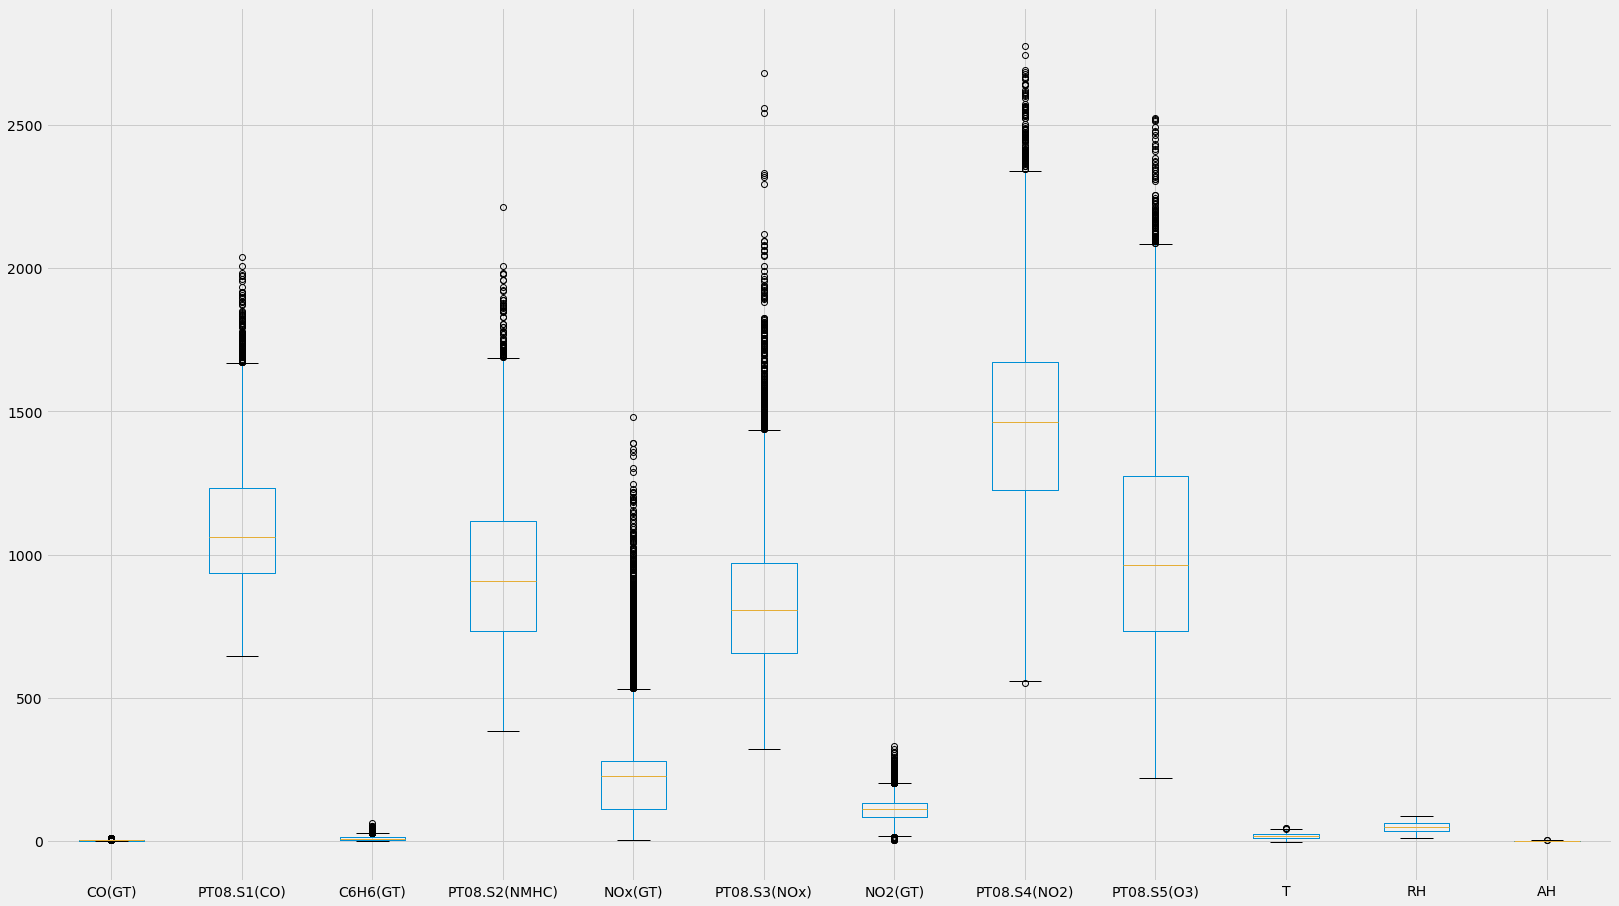

In [15]:
df.boxplot(figsize=(25,15))

<AxesSubplot:>

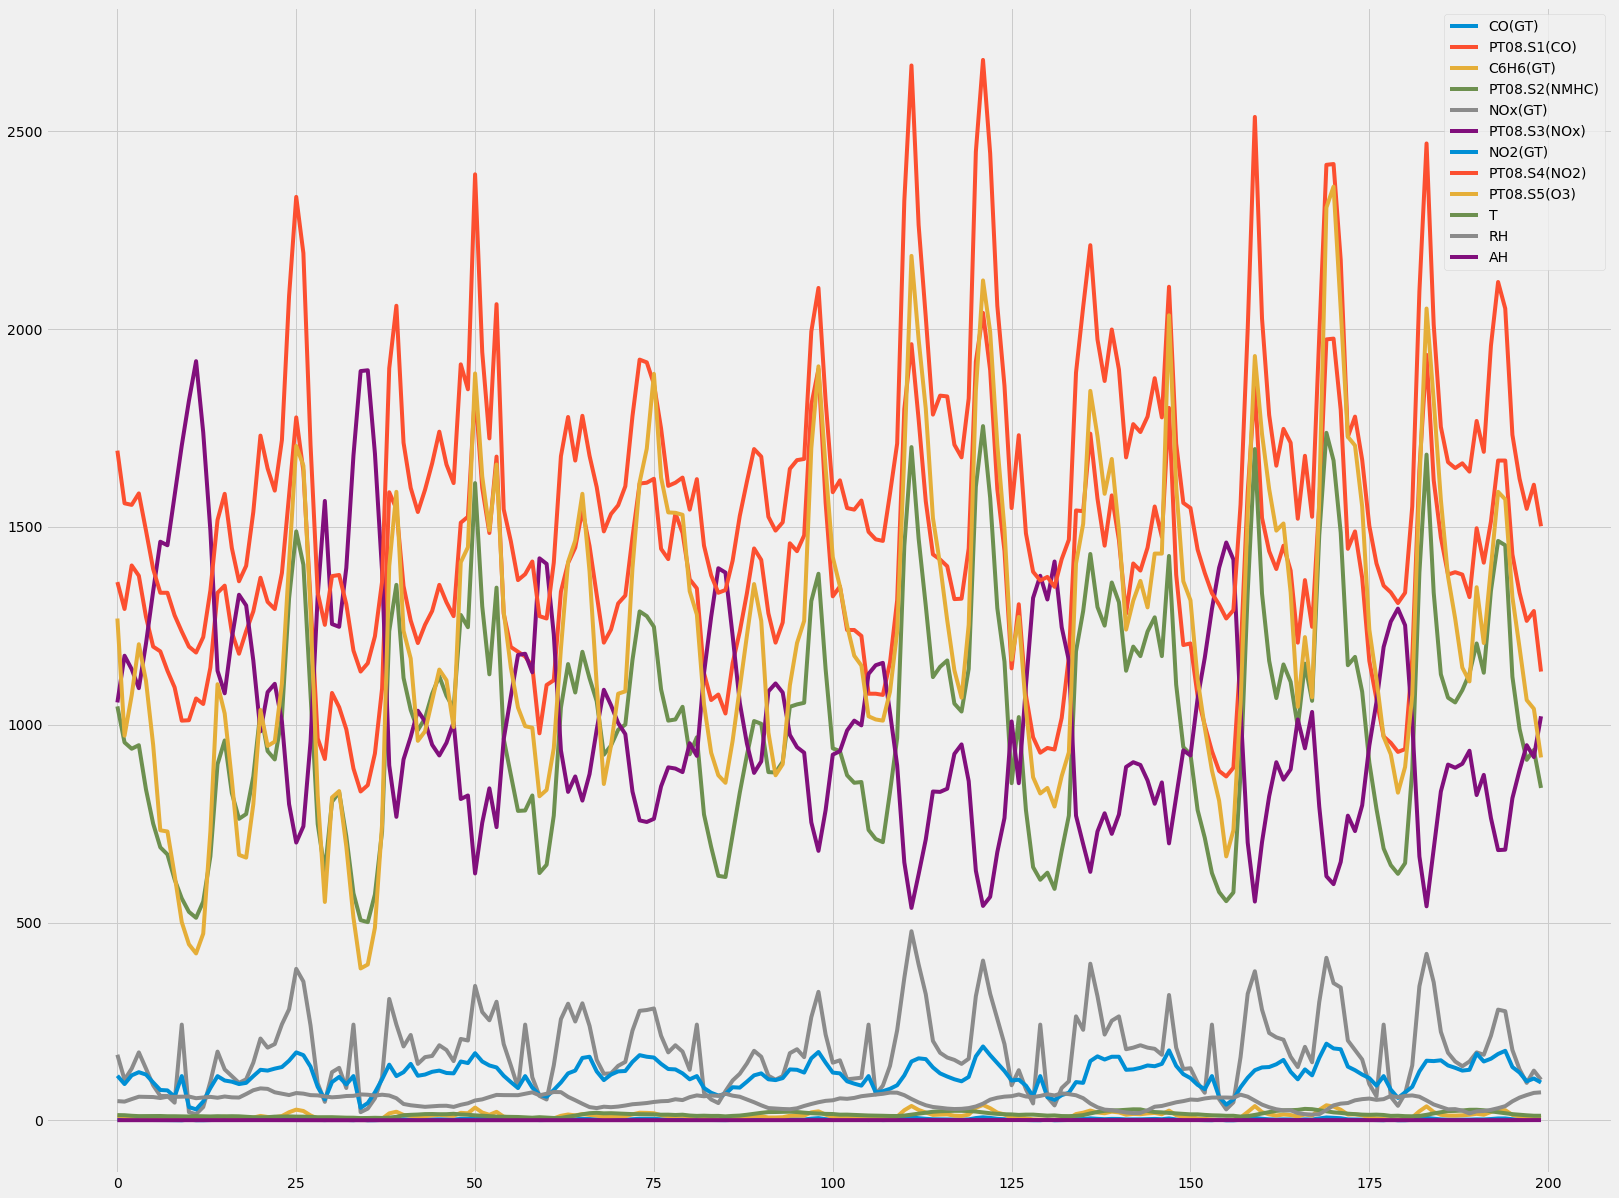

In [16]:
df[:200].plot(figsize=(25,20))

#### As you can see, their distribution is very cconfused, and we will compare it with the state after the preprocessing is completed.

#### Here, I printed the boxplots we used in the IQR method separately in order to see them correctly.

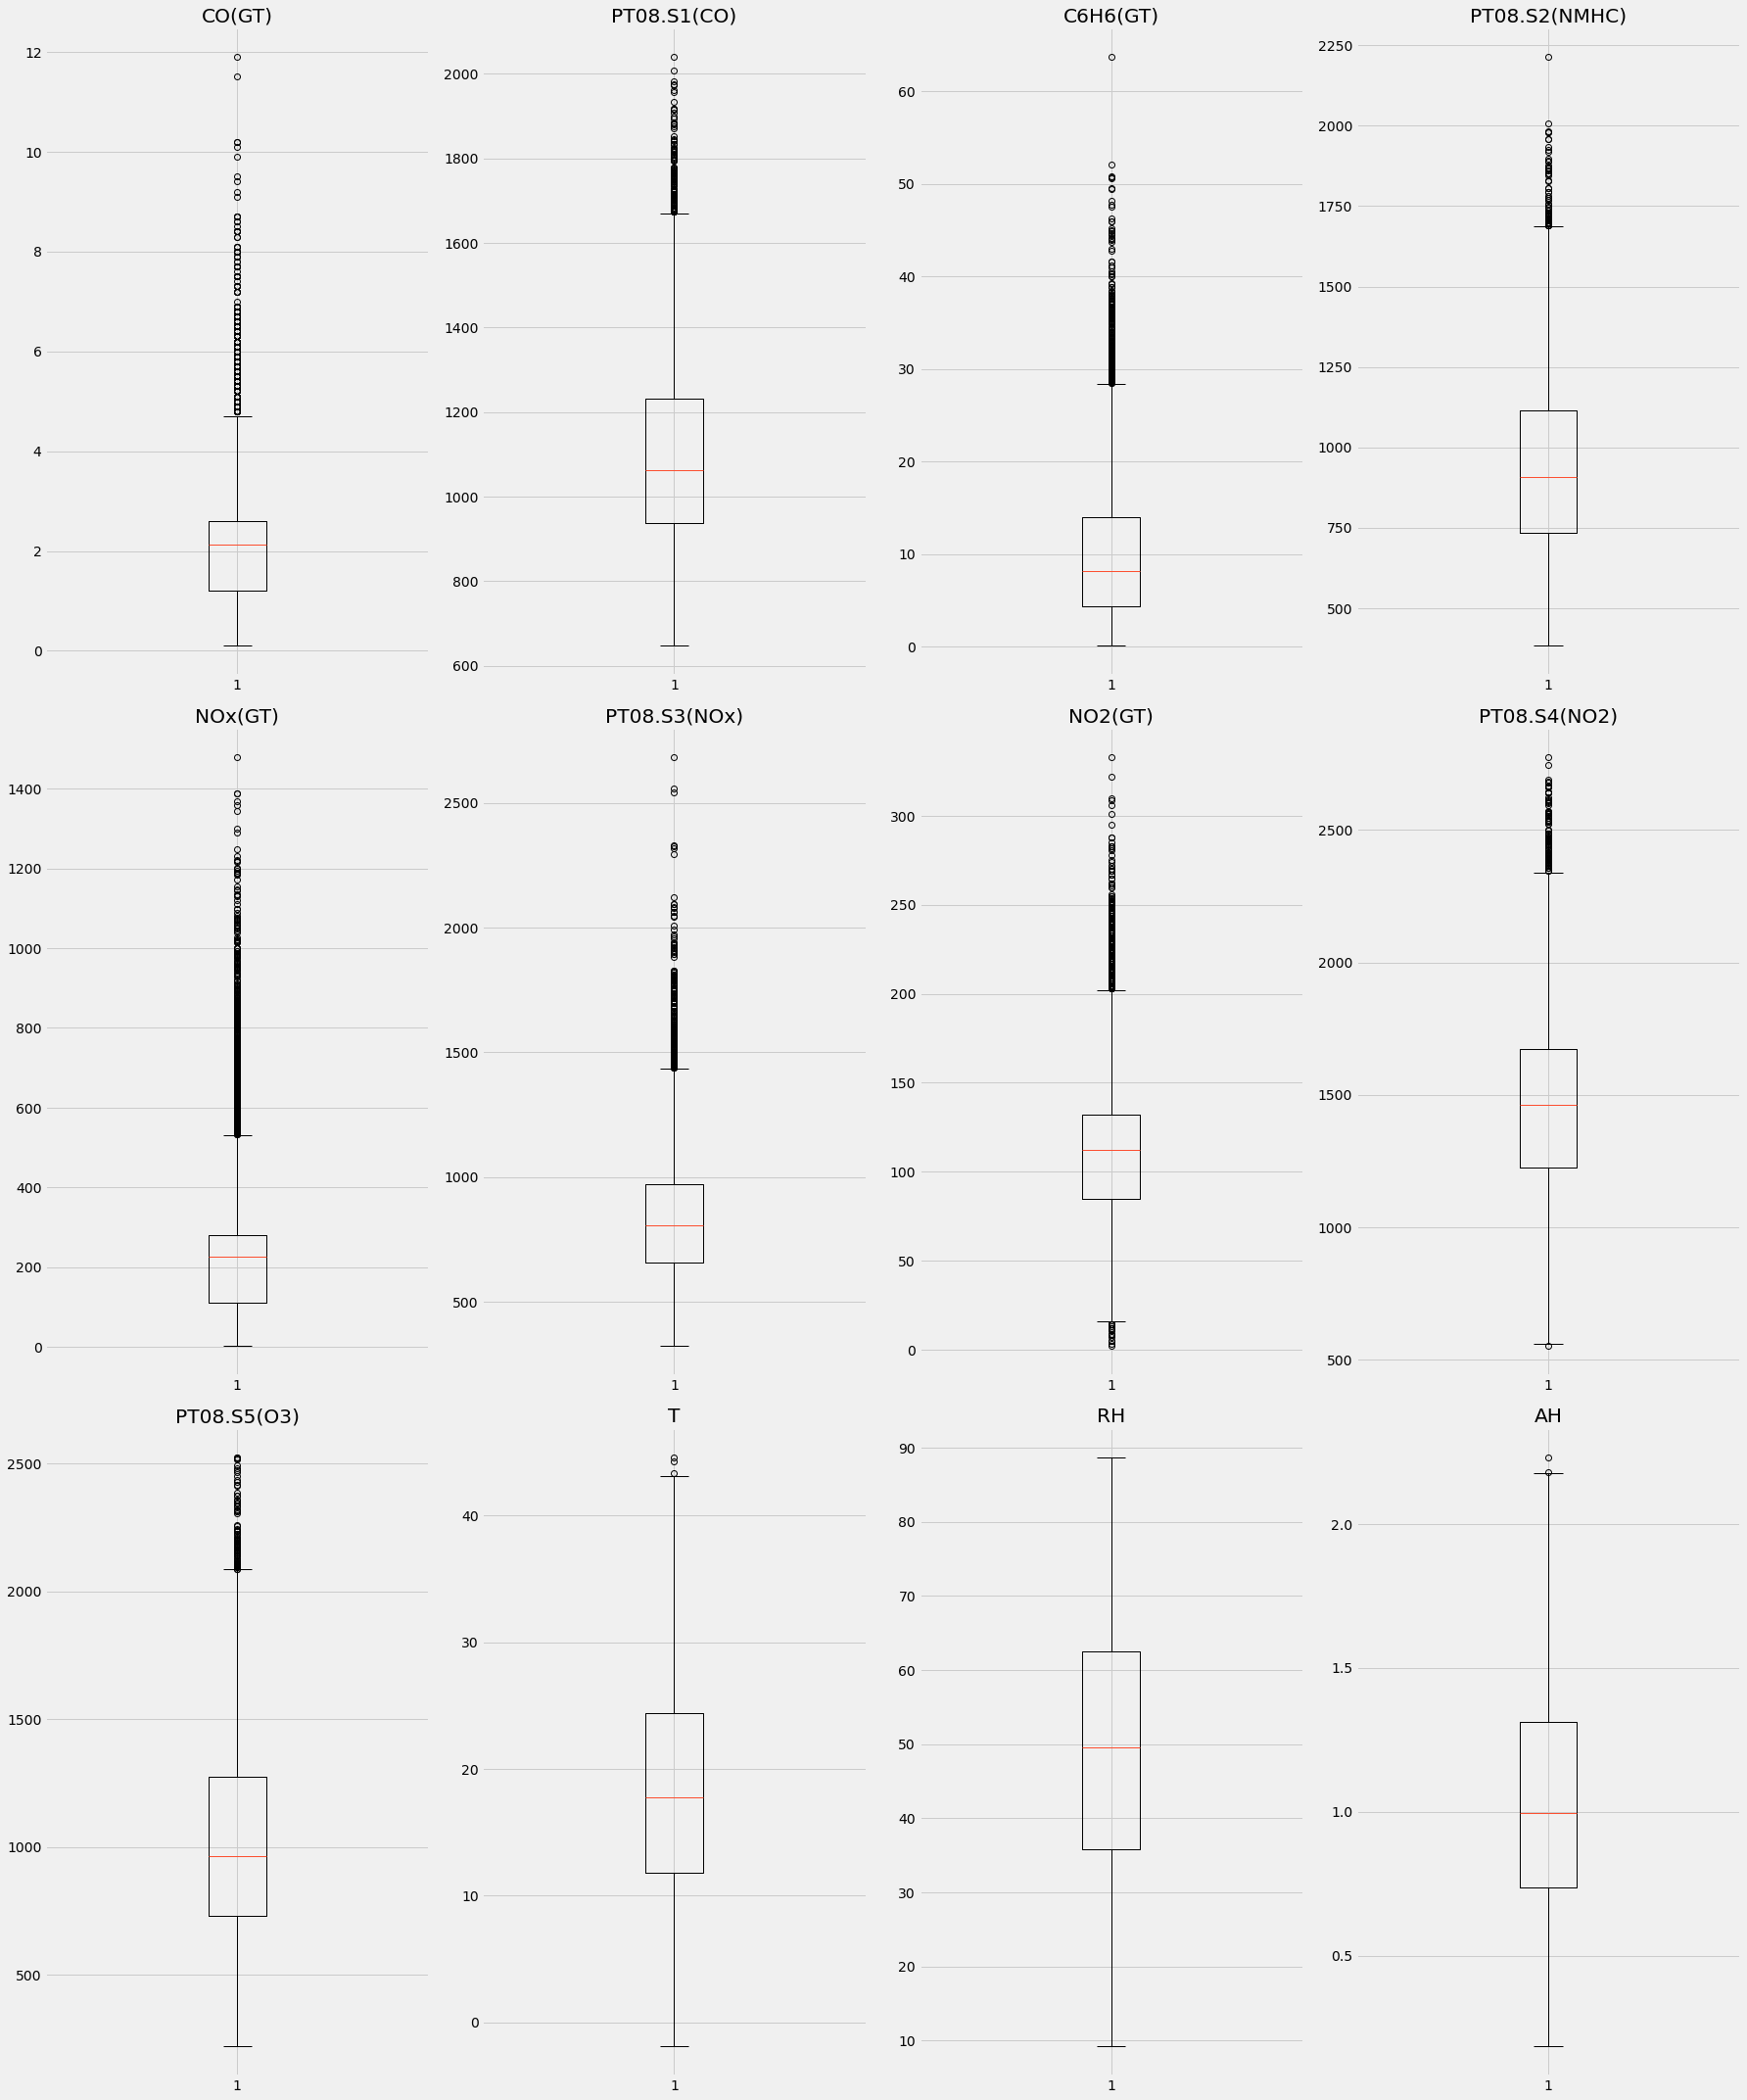

In [17]:
fig, axs = plt.subplots(3,4, figsize=(25,30))
for i in range(3):
    for c in range(4):
        axs[i, c].boxplot(df[df.columns[c+(4*i)]])
        axs[i, c].set_title(df.columns[c+(4*i)])
fig.tight_layout()

### For outlier detection, I used the outlier detection formula that we saw in the AIN427 lesson.

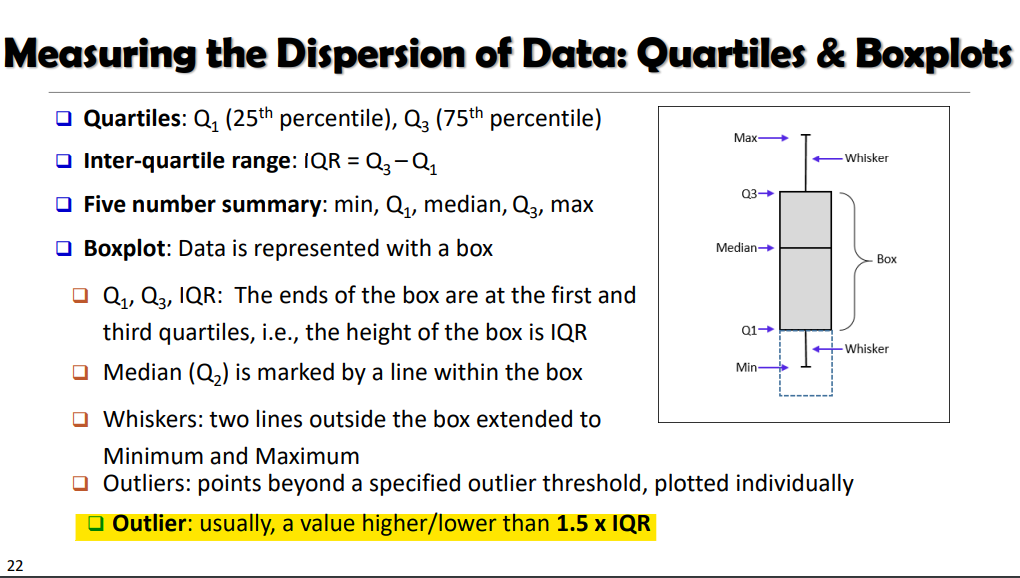

#### When we remove the outliers, we see that the number of data has decreased from 8991 to 7189.

In [18]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    df = df[(df[col] > lower_lim) & (df[col] < upper_lim)]

print('Length of dataset:', len(df))
df.head()

Length of dataset: 7189


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### Boxplots after removing the outliers.
#### After the outliers were removed, the boxplots became much more organized and understandable as can be seen.

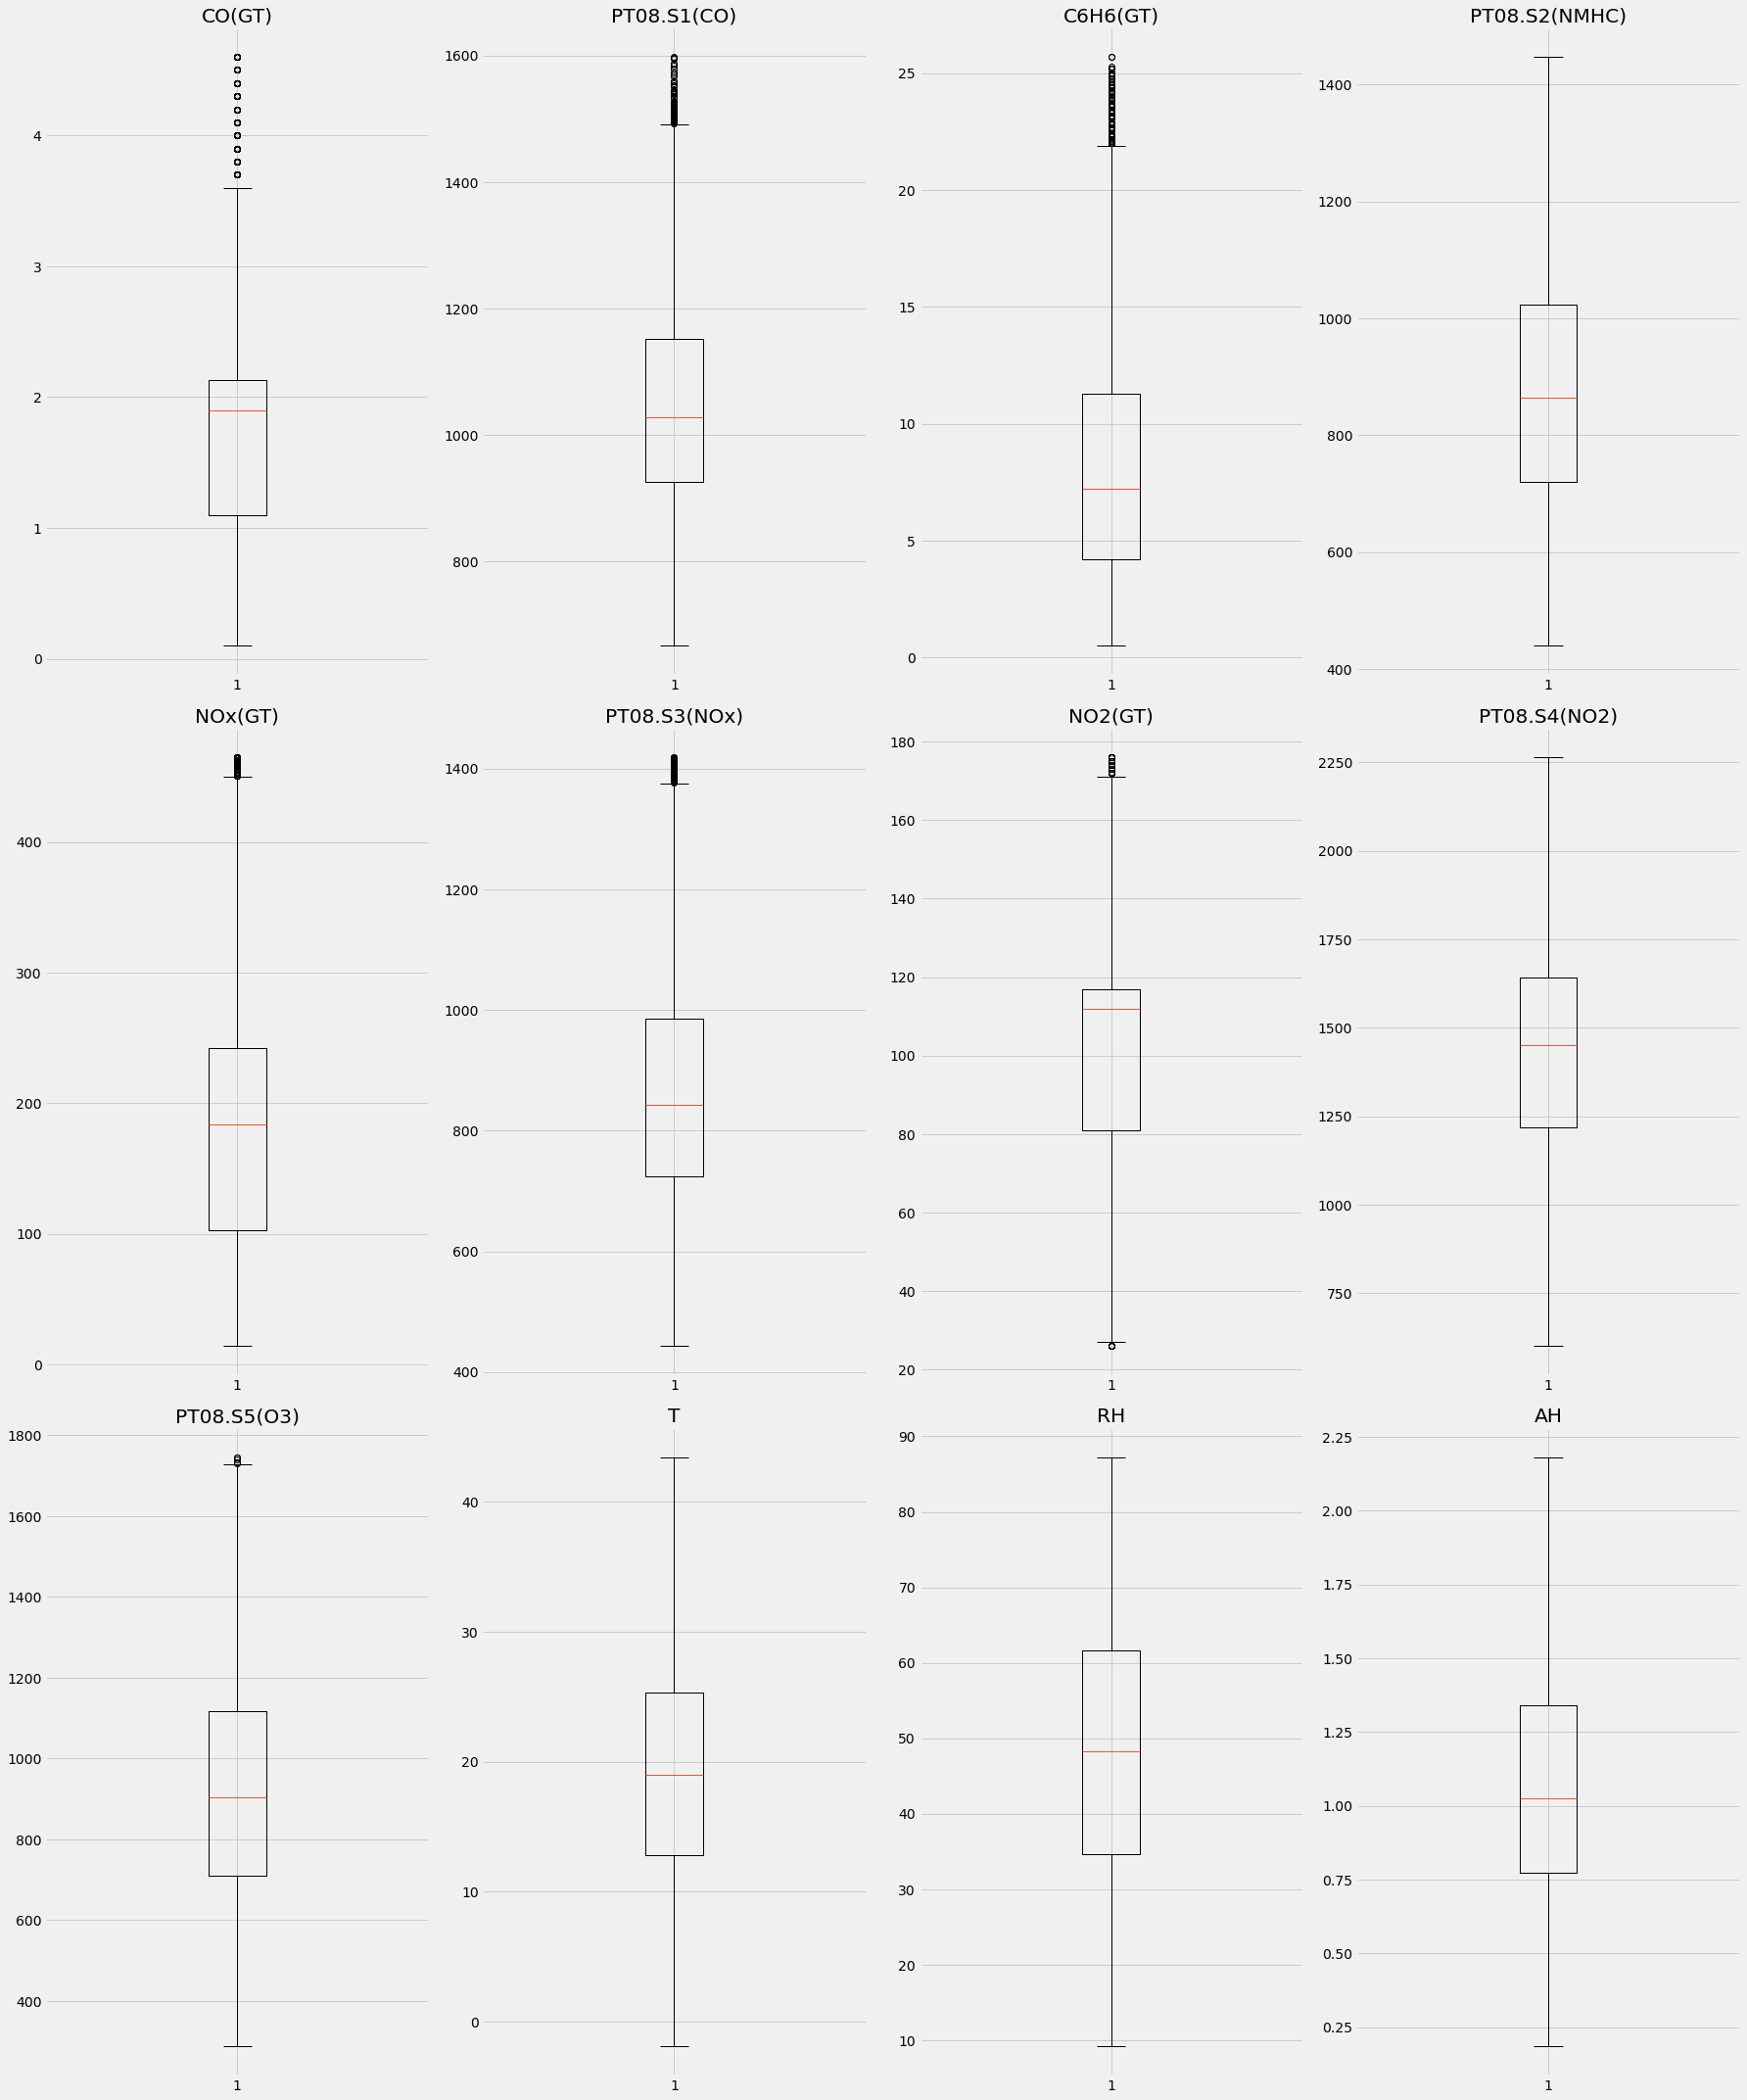

In [19]:
fig, axs = plt.subplots(3,4, figsize=(25,30))
for i in range(3):
    for c in range(4):
        axs[i, c].boxplot(df[df.columns[c+(4*i)]])
        axs[i, c].set_title(df.columns[c+(4*i)])
fig.tight_layout()

## Data Transformation

### Here I decided to use MinMax Normalization, which is one of the most well-known methods, and looked at the properties of the dataframe before and after it.

In [20]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000
mean,1.790053,1050.576993,8.265865,882.310335,184.453965,863.667409,102.143341,1426.053554,924.159828,19.192196,48.225581,1.053076
std,0.834885,164.729762,5.146685,206.566421,96.917491,192.395995,30.551062,311.759969,288.610379,8.884561,17.350359,0.402764
min,0.100000,667.000000,0.500000,440.000000,14.000000,443.000000,26.000000,601.000000,288.000000,-1.900000,9.200000,0.184700
25%,1.100000,926.000000,4.200000,720.000000,103.000000,724.000000,81.000000,1219.000000,710.000000,12.800000,34.600000,0.773400
50%,1.900000,1029.000000,7.200000,865.000000,184.000000,843.000000,112.000000,1452.000000,903.000000,19.000000,48.300000,1.024200
75%,2.129711,1152.000000,11.300000,1024.000000,242.189292,985.000000,117.000000,1642.000000,1118.000000,25.300000,61.600000,1.339900
max,4.600000,1598.000000,25.700000,1447.000000,465.000000,1419.000000,176.000000,2264.000000,1745.000000,43.400000,87.200000,2.180600


In [21]:
scaler = preprocessing.MinMaxScaler()
sc = scaler.fit_transform(df)
df = pd.DataFrame(sc, columns=df.columns)

In [22]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000
mean,0.375567,0.412005,0.308169,0.439236,0.377947,0.431012,0.507622,0.496124,0.436623,0.465611,0.500328,0.435080
std,0.185530,0.176939,0.204234,0.205131,0.214895,0.197127,0.203674,0.187468,0.198085,0.196127,0.222440,0.201796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.278195,0.146825,0.278054,0.197339,0.287910,0.366667,0.371618,0.289636,0.324503,0.325641,0.294955
50%,0.400000,0.388829,0.265873,0.422046,0.376940,0.409836,0.573333,0.511726,0.422100,0.461369,0.501282,0.420612
75%,0.451047,0.520945,0.428571,0.579940,0.505963,0.555328,0.606667,0.625977,0.569664,0.600442,0.671795,0.578787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All features got values between 0 and 1 as we wanted.

## Data Reduction

#### I found on the internet while examining the features in the dataset.
#### http://www.differencebetween.net/science/nature/difference-between-absolute-and-relative-humidity
#### I found the following table:

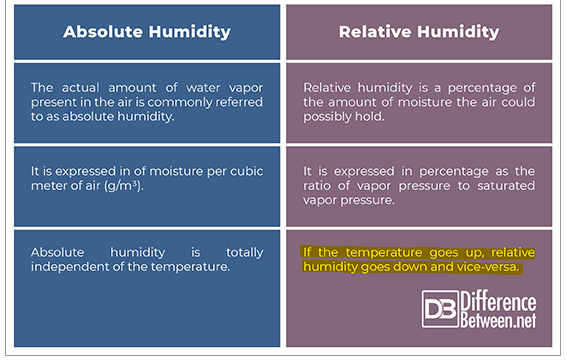

#### Since there is a relationship between Temperature and Relative Humidity as above, I thought there was no need for the 'RH' feature and deleted it.

In [23]:
df = df.drop(df.columns[[10]], axis=1)

#### Last version of Dataset:

In [24]:
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.555556,0.744361,0.452381,0.601787,0.337029,0.628074,0.580000,0.656043,0.672615,0.342163,0.287139
1,0.422222,0.671321,0.353175,0.511420,0.197339,0.748975,0.440000,0.576067,0.469458,0.335541,0.270955
2,0.466667,0.789474,0.337302,0.495531,0.259424,0.714139,0.586667,0.573662,0.539465,0.304636,0.283331
3,0.466667,0.761547,0.345238,0.504469,0.350333,0.664959,0.640000,0.591100,0.628003,0.284768,0.301618
4,0.333333,0.649839,0.238095,0.393247,0.259424,0.780738,0.600000,0.534576,0.564173,0.289183,0.302670
...,...,...,...,...,...,...,...,...,...,...,...
7184,0.088889,0.237379,0.031746,0.087388,0.139690,0.649590,0.180000,0.232111,0.199039,0.271523,0.285736
7185,0.222222,0.390977,0.154762,0.287984,0.372506,0.324795,0.446667,0.317498,0.423473,0.251656,0.284784
7186,0.511111,0.510204,0.472222,0.618669,0.618625,0.163934,0.993333,0.384847,0.551819,0.635762,0.228418
7187,0.444444,0.360902,0.357143,0.517378,0.490022,0.265369,0.866667,0.264582,0.330817,0.666667,0.164938


### After completing all the preprocessing, I reprinted the two plots I had plotted before performing Outlier detection, Data Transformation and Data Reduction.

<AxesSubplot:>

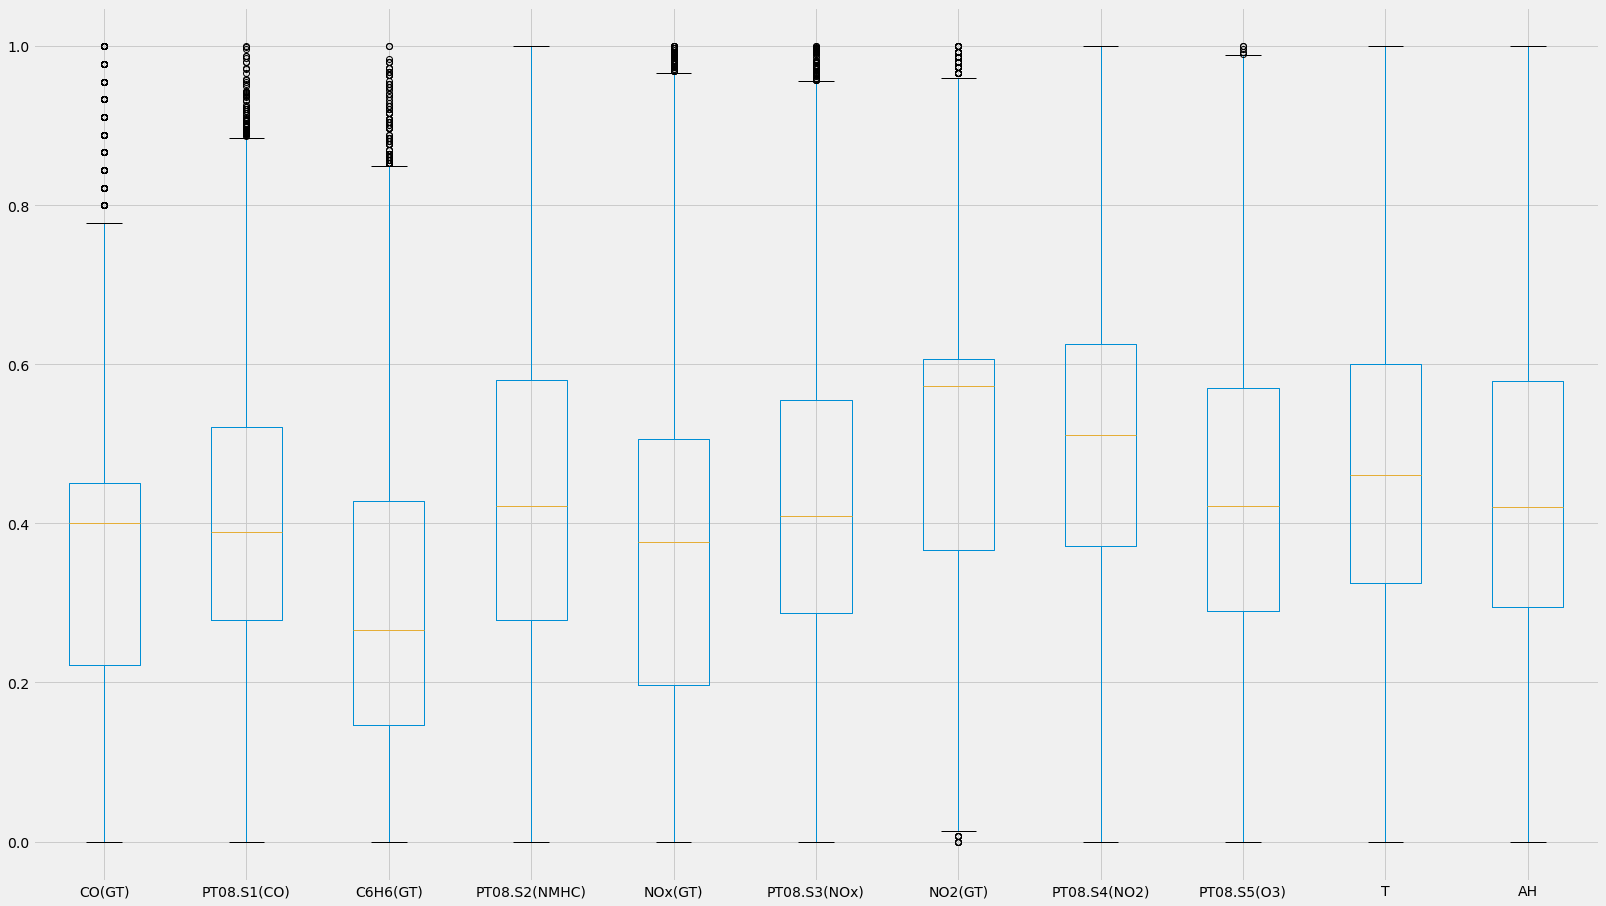

In [25]:
df.boxplot(figsize=(25,15))

<AxesSubplot:>

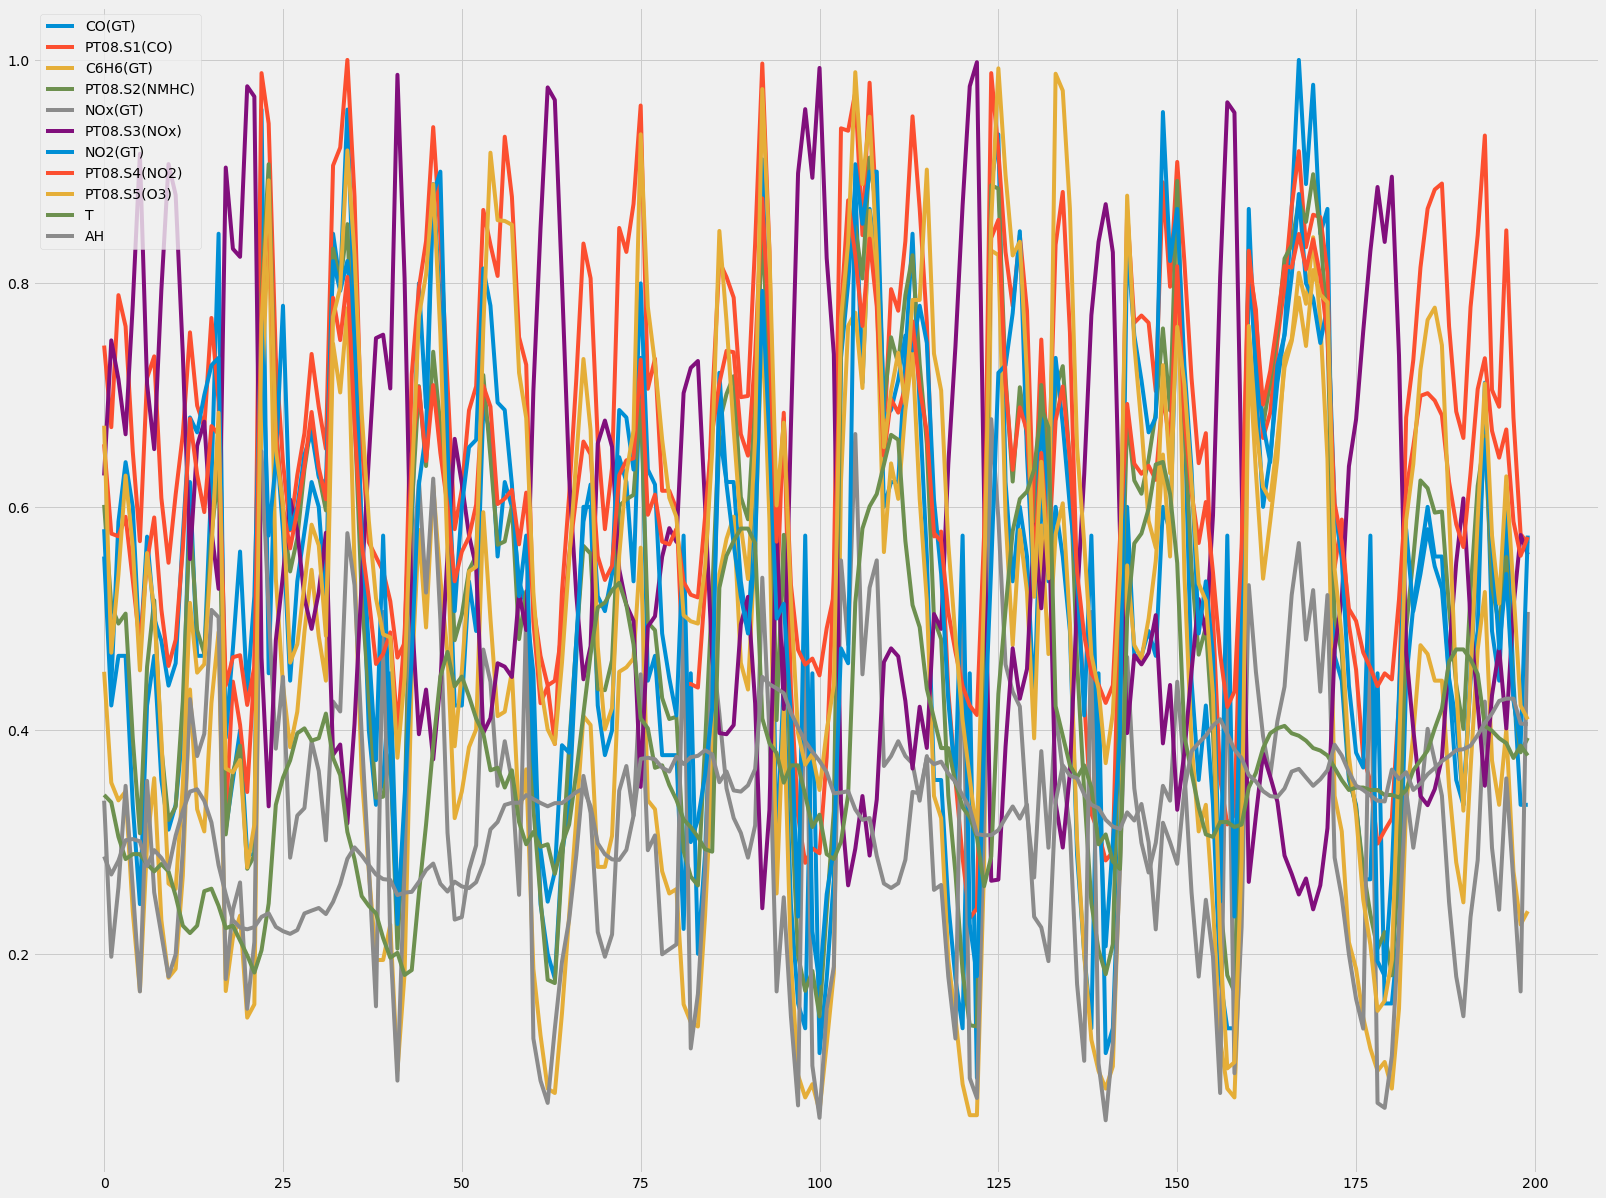

In [26]:
df[:200].plot(figsize=(25,20))

### When we looked at the first plots, the data was scattered in a very confused way, but after all these preprocess stages, all features became more meaningful. And we have made the data completely ready for the model.